**Coursework Breakdown - Delete**


**Objective**

You will prepare a tutorial in which you showcase the Jupyter Notebook capabilities in demonstrating a machine learning pipeline of your choice. You are
encouraged to look up for online tutorials to use as examples, but you need to
develop your own pipeline. The final aim is to create an example of developing
an AI system that can be showcased online and can be used as part of your
portfolio in job applications.

**Must Include**
1. A clear title that illustrates the topic of the tutorial. - ✅
2. An abstract of 80 to 100 words that summarises the content. - ✅
3. A list of learning objectives that will be achieved by following this tutorial. - ✅
4. A table of content. - ✅
6. At least the following libraries: Pytorch, Matplotlib, Numpy. - ✅
7. Use of markup. - ✅
8. Clear identification of sources to avoid plagiarism. - ✅
9. Use one dataset, e.g., the MNIST - ✅
10. A training process for a machine learning algorithm, e.g., the optimization
of a neural model. - ✅
11. How different configurations of hyper-parameters affects the results.  - ✅
12. Results with both graphs and tables. - ✅
13. A list of references at the end. - ✅
5. Differences with pros and cons in relation to cited sources of similar online
tutorials.

A short description in the form of a comparison between your tutorial and
similar online tutorials (which should be cited). If possible, the
comparison should include key differences as well as the pros and cons of
each.

14. A reading time of 10 to 15 minutes.

Due 19th March

**Marking Scheme**

Marks will be awarded according to the following criteria:

• Completeness: Does the tutorial cover all required components (e.g.,
abstract, objectives, dataset, training process, results, references, etc.)?
[25%]

• Clarity and code quality: Are the explanations logically structured and
easy to follow? Do they enhance the learning experience? Is the Jupyter
Notebook code well-structured, efficient, and properly documented? Does
it execute correctly? [25%]

• Presentation quality and professional elements: : Are graphs, tables, and markdown explanations clear and informative? Do they enhance
the tutorial’s readability? [25%]

• Originality and critical thinking: Does the tutorial show a unique
perspective, creativity, or novel insights beyond existing tutorials? Does
it critically compare different techniques? [25%]


# **<u>Handwritten Digit Recognition with PyTorch: A CNN Approach</u>**


## **Abstract**  
---

This project demonstrates the capabilities of **Jupyter Notebook** by developing a **machine learning (ML) pipeline** for **Optical Character Recognition (OCR)**. The pipeline takes an **image** as input, processes it using **pre-processing techniques**, and extracts the **text** within it, providing users with a readable and copyable output.  

It utilizes libraries such as **PyTorch, Torchvision, Matplotlib and NumPy** to achieve accurate and efficient text extraction. This project highlights Jupyter Notebook’s effectiveness in building and executing **ML workflows** for real-world applications.  


## **Contents**  
---

- [Learning Objectives](#learning-objectives)  
- [Required Imports](#required-imports)  
- [Neural Network Algorithm](#nna)  
- [How Hyper-Parameters Affect the Model](#hyper-parameters)  
- [Results](#results)  
- [References](#references)
- [Bibliography](#bibliography)

## **Learning Objectives** <a class="anchor" id="learning-objectives"></a>
---

- Learn to structure an **AI workflow** in Jupyter Notebook for better readability and reproducibility.  
- Understand how to **set up a machine learning environment** – import necessary libraries and learn their functions.  
- Learn how to **load and pre-process data** efficiently.  
- Build a **Convolutional Neural Network (CNN)** and understand the purpose of each layer.  
- Train a **Neural Network** using different techniques to improve performance (e.g., **backpropagation**).  
- Learn how to effectively **evaluate, visualize, and present** a model’s performance.  
- Understand the **effects of hyperparameters** and how to fine-tune them correctly.  


## **Required Imports** <a class="anchor" id="required-imports"></a>
---

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

- **`torch`** → Core <a href="https://pytorch.org/">PyTorch</a> library used for creating deep neural networks (Yasar, 2022).
- **`torch.nn`** → Provides modules used to train and build layers of neural networks (Prakriti, 2024).  
- **`torch.optim`** → Contains optimization algorithms such as **SGD, Adam** (PyTorch, n.d).  
- **`torchvision`** → Provides multiple tools to support with computer vision tasks (Gomede, 2023).  
- **`torchvision.transforms`** → Contains image transformation functions to help with **normalization, resizing, and augmentation** (PyTorch, n.d).
- **`matplotlib.pyplot`** → Core <a href="https://matplotlib.org/">matplotlib</a> libary used for **visualizing** data into graphs (matplotlib, n.d).
- **`numpy`** → Core <a href="https://numpy.org/">numpy</a> libarary which provides key **numerical functions** for handling arrays (NumPy, n.d).  
- **`pandas`** → Core <a href="https://pandas.pydata.org/">pandas</a> libary which provides functions for **analyzing, cleaning, exploring, and manipulating data** (w3schools, n.d).  


## **Neural Network Algorithm** <a class="anchor" id="nna"></a>
---

### **Downloading and Preparing the Dataset**

The aim of this code is to download and prepare the **MNIST dataset** for the model to train and test on. It does this by first converting the images to **tensors** , and normalising the pixel values to a range between **[-1, 1]**. This ensures that the training process of the model is stable.

In [7]:
# Define transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

The **training** data (consisting of **60,000** images) and **test** data (consisting of **10,000** images) sets are loaded using **`torchvision.datasets.MNIST`**, to ensure that the data is downloaded if not available.

In [8]:
# Load MNIST dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

The **dataloaders** are then created. They have a **batch size of 64**, and **shuffle** the training data so that there is a better generalisation of the results, but keeps the test data unchanged.

In [9]:
# Define data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Check dataset size
print(f"Train set: {len(trainset)}, Test set: {len(testset)}")

Train set: 60000, Test set: 10000


### **The Convolutional Neural Network**
This code defines a **Convolutional Neural Network (CNN)** for handwritten digit recognition. The model uses the function provided by the **`PyTorch.nn`** package, and consists of 4 layers: (i) **Convolutional**; (ii) **Pooling**; (iii) **Activation**; (iv) **Fully connected**. The convolutional layer aims to extract **key features and patterns** from the input data (Deep Learning on Edge Computing Devices, 2022). The pooling layer is responsioble for **reducing the spatial dimensions of the input data** (dremio, n.d). The activation layer enables the model to **recognise and learn complex patterns** in the input data (Ali, 2024). The fully connected layer **connects all the nodes in one layer to all the nodes in another layer** (GeeksForGeeks, 2024). The **`forward()`** function determines the data flow through the CNN, and specifies how the input data moves through each of these layers.

In [24]:
class CNN(nn.Module):
    def __init__(self, COLOUR_CHANNELS, FILTERS, CONV_KERNEL_SIZE, POOL_KERNEL_SIZE, PADDING, STRIDE, NUMBER_NEURONS):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(COLOUR_CHANNELS, FILTERS, kernel_size=CONV_KERNEL_SIZE, padding=PADDING) # Colour Channels, Number of Filters, Kernel Size, Padding
        self.conv2 = nn.Conv2d(FILTERS, FILTERS*2, kernel_size=CONV_KERNEL_SIZE, padding=PADDING) # Colour Channels, Number of Filters, Kernel Size, Padding
        self.pool = nn.MaxPool2d(kernel_size=POOL_KERNEL_SIZE, stride=STRIDE) # Kernel Size, Stride
        self.fc1 = nn.Linear(FILTERS*2 * 7 * 7, NUMBER_NEURONS) # Flattened Input Size, Number of Neurons
        self.fc2 = nn.Linear(NUMBER_NEURONS, 10) # Input Size, Number of Classes
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model1 = CNN(1, 32, 3, 2, 1, 2, 128)
model2 = CNN(1, 32, 3, 2, 1, 2, 128)

The spatial size of the MNIST dataset is **28x28** with a **colour channel of 1** (greyscaled), resulting in the **spatial dimensions being 1x28x28**. For model1, the first convolutional layer takes the input image and **applies 32 filters of size 3x3 with a padding of 1**. This preserves the spatial dimensions, and thus **results in an output size of 32x28x28**. Following this is a pooling layer with a **kernel size and stride of 2**, reducing the width and height by half. This produces the **feature map of spatial dimensions 32x14x14**. The second convolutional layer takes the feature map, and **applies 64 filters to it of size 3x3**, resulting in **spatial dimensions of 64x14x14**. Another pooling layer is then applied, halving the width and height again, thus resulting in a **spatial size of 64x7x7**. Before passing the data to the fully connected layers, the output is **flattened into a 1D tensor of size 64x7x7=3136**. This is then fed into the first fully connected layer, **reducing it to 128 neurons**. The second fully connected layer then **maps the 128 features to the 10 output classes**, representing the number of categories in the classification task.

In model2, the calculations stay the same, but we can compare the model to another with different hyperparameters to allow us to compare and determines the best combination.

### **The Criterion and Optimiser**

The **criterion** and **optimizer** are key components when training this neural network.  

- **`criterion = nn.CrossEntropyLoss()`**: This defines the loss function used to measure the error between the predictions and the truth data throught the training process (nn, n.d).

In [25]:
criterion = nn.CrossEntropyLoss()

- **`optimizer = optim.Adam(model.parameters(), lr=0.001)`**: Aims to improve the model by adjusting the parameters throught the training to minimise the loss function value (Balawejder, 2022).

In [28]:
optimiser1 = optim.Adam(model1.parameters(), lr=0.001)
optimiser2 = optim.Adam(model2.parameters(), lr=0.001)

The combination of these ensure that the CNNs training process improves its predictions over time.

### **Training**
---

#### **Initialisation**
- The number of **epochs** determines how many times the model is trained on the data.
- The device determines whether the model will use the **GPU** (cuda) or **CPU** to train. Training on a GPU is much more efficient.
- Arrays are initialised to store key information about the model and its training.

#### **Training Phase (`model.train()`)**  
For each epoch:  
1. The model initialises training using `model.train()`.  
2. The **running loss and accuracy** are initialized in order to track performance.  
3. The loop iterates over **training batches: (`trainloader`)**.  
4. **Gradients are reset: (`optimizer.zero_grad()`)**.  
5. **The model makes predictions: (`outputs = model(images)`)** and computes the **loss: (`criterion(outputs, labels)`)**.  
6. **Backpropagation: (`loss.backward()`)** calculates the gradients, and **optimizer: (`optimizer.step()`)** updates the models weights.  
7. **Accuracy is calculated** by comparing predicted labels with the truth values.  

After looping through all training batches, the **epoch's average loss and accuracy are computed and stored**.  

#### **Validation Phase (`model.eval()`)**  
After training, the model begins **evaluation: (`model.eval()`)**.
1. The loop iterates over **test batches: (`testloader`)**.
2. **Predictions** and **loss** are computed. 
3. **Validation loss** and **accuracy** are stored for performance tracking.  

#### **Saving the Best Model**  
- If the **validation accuracy** improves, the **model's state is saved: (`torch.save(model.state_dict(), "best_model.pth")`)**, to ensure the best model is saved.  


In [36]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def trainModel(model, optimiser, model_name, num_epochs=1):
    print(f"Training Model: {model_name}")

    # Initialise variables
    train_losses = np.zeros(num_epochs)
    val_losses = np.zeros(num_epochs)
    train_accuracies = np.zeros(num_epochs)
    val_accuracies = np.zeros(num_epochs)
    best_val_acc = 0.0

    model.to(device)

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct, total = 0, 0

        for images, labels in trainloader:
            images, labels = images.to(device), labels.to(device)

            optimiser.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimiser.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Calculates training loss & accuracy
        train_losses[epoch] = running_loss / len(trainloader)
        train_accuracies[epoch] = 100 * correct / total

        # Validation Phase
        model.eval()
        val_loss, val_correct, val_total = 0.0, 0, 0

        with torch.no_grad():
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_losses[epoch] = val_loss / len(testloader)
        val_accuracies[epoch] = 100 * val_correct / val_total

        # Saves the best model
        if val_accuracies[epoch] > best_val_acc:
            best_val_acc = val_accuracies[epoch]
            torch.save(model.state_dict(), f"{model_name}_best_model.pth")

        print(f"Epoch {epoch+1}/{num_epochs} - "
              f"Train Loss: {train_losses[epoch]:.4f}, Train Acc: {train_accuracies[epoch]:.2f}% | "
              f"Val Loss: {val_losses[epoch]:.4f}, Val Acc: {val_accuracies[epoch]:.2f}%")

    print(f"Training complete for {model_name}. Best Validation Accuracy: {best_val_acc:.2f}%")

    return train_losses, val_losses, train_accuracies, val_accuracies

train_losses_1, val_losses_1, train_accs_1, val_accs_1 = trainModel(model1, optimiser1, "model_1")
train_losses_2, val_losses_2, train_accs_2, val_accs_2 = trainModel(model2, optimiser2, "model_2")


Training Model: model_1
Epoch 1/1 - Train Loss: 0.0099, Train Acc: 99.63% | Val Loss: 0.0286, Val Acc: 99.07%
Training complete for model_1. Best Validation Accuracy: 99.07%
Training Model: model_2
Epoch 1/1 - Train Loss: 0.1611, Train Acc: 95.04% | Val Loss: 0.0627, Val Acc: 97.96%
Training complete for model_2. Best Validation Accuracy: 97.96%


## **How Hyper-Parameters Affect the Model** <a class="anchor" id="hyper-parameters"></a>

---

#### **1. Batch Size** - Determines how many samples are passed to the model at a time during training.  
- **Larger** → Faster training but may result in less diverse results.  
- **Smaller** → Slower training but often leads to better generalization.  

#### **2. Shuffle** - Randomly shuffles the dataset before each epoch.  
- **True** → Default for training. Helps the model generalize better by preventing it from memorizing data order.  
- **False** → Ensures evaluation is done on the same ordered dataset.  

#### **3. Normalisation** - Normalizes pixel values to a range between two points.  
- Improves convergence, making training more stable. Poor normalization can lead to inefficient learning and poor performance.  

#### **4. Number of Filters** - Defines the number of convolutional kernels that detect patterns.  
- **More** → Longer computation but better feature detection.  
- **Less** → Faster training but less effective feature detection.  

#### **5. Kernel Size** - Size of the filter that scans the image.  
- **Larger** → Captures bigger patterns but may miss finer details.  
- **Smaller** → Preserves fine details but results in longer training times.  

#### **6. Padding** - Adds extra pixels to maintain spatial dimensions.  
- Prevents information loss by keeping the output size the same.  

#### **7. Pooling Size** - Reduces dimensions while preserving important features.  
- **Larger** → Reduces size significantly but may remove details.  
- **Smaller** → Retains more details but with less reduction.  

#### **8. Stride** - Determines how far the filter moves at each step.  
- Affects the output size and information retention.  

#### **9. Fully Connected Layer Size** - Defines the number of neurons in the dense layer.  
- **More Neurons** → Captures complex features but increases training time.  

#### **10. Activation Function** - Introduces non-linearity into the model.  
- Speeds up training and prevents vanishing gradients.  

#### **11. Learning Rate** - Controls how much the model updates during training.  
- **Lower** → Slower but more stable training.  
- **Higher** → Faster training but risk of overshooting or overfitting.  

#### **12. Epochs** - Determines how many times the model trains on the dataset.  
- More epochs allow deeper learning but may cause overfitting.  

#### **13. Optimiser** - Controls how the model updates weights.  
- Using **Adam** instead of traditional optimizers like SGD improves convergence speed and stability.  

## **Results** <a class="anchor" id="results"></a>
---

### **Evaluating the Model on the Test Set**  

This code evaluates the trained **CNN model** on the **test dataset** to measure its final accuracy.  

- **`correct = 0, total = 0`**: These variables keep track of the number of correctly predicted samples and the total number of samples.  
- **`model.eval()`**: Begins **evaluation**, which disables features like **dropout** and **batch normalization updates** for stable predictions.  
- **`with torch.no_grad():`**: This disables the gradient calculation which **reduces memory usage and speeds up inference** as gradients are not needed for evaluation.  
- **Iterating over the `testloader`**: The loop goes through all batches of **test images and labels**.  
- **`outputs = model(images)`**: The model makes predictions on the test images.
- **`_, predicted = torch.max(outputs, 1)`**: Extracts the class with the highest prediciton probability.  
- **`correct += (predicted == labels).sum().item()`**: Counts the number of correct predictions.
- **Final Accuracy Calculation**: The accuracy is calculated as **(correct predictions / total samples) × 100**.  

In [41]:
def evaluate_model(model, model_name):
    correct = 0
    total = 0
    model.eval()

    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on test set for {model_name}: {accuracy:.2f}%')

evaluate_model(model1, "model_1")
evaluate_model(model2, "model_2")

Accuracy on test set for model_1: 99.07%
Accuracy on test set for model_2: 97.96%


### **Visualizing Model Predictions**  

- **`images, labels = next(iter(testloader))`**: Retrieves a batch of the test images and labels.  
- **`outputs = model(images.to(device))`**: Generate predictions onthe test data.  
- **`_, predictions = torch.max(outputs, 1)`**: Extracts the predicted class with the highest probability for each image.  
- Plots the predictions in relation to the test data.

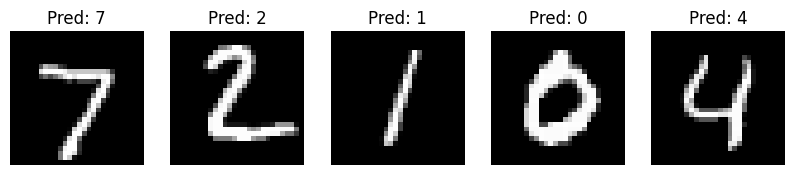

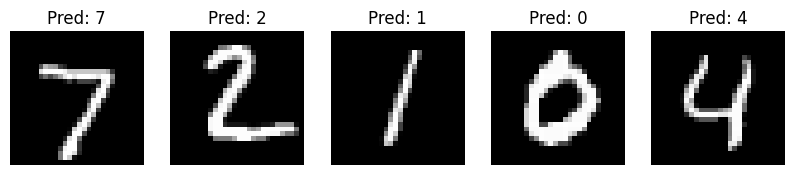

In [38]:
def visualize_predictions(model):
    images, labels = next(iter(testloader))
    outputs = model(images.to(device))
    _, predictions = torch.max(outputs, 1)

    fig, axes = plt.subplots(1, 5, figsize=(10,2))
    for i in range(5):
        img = images[i].numpy().squeeze()
        axes[i].imshow(img, cmap="gray")
        axes[i].set_title(f'Pred: {predictions[i].item()}')
        axes[i].axis('off')
    plt.show()

visualize_predictions(model1)
visualize_predictions(model2)

### **Visualizing Training Performance**  

This code generates **two plots** to analyze how the model improves during training over multiple epochs.  

- **`plt.figure(figsize=(12, 5))`**: Creates a figure with a **width of 12 and height of 5**, providing enough space for two subplots.  

#### **Training Loss Plot**  
- **`plt.subplot(1, 2, 1)`**: Defines the first subplot (1 row, 2 columns, first plot).  
- **`plt.plot(range(1, num_epochs + 1), train_losses, marker='o', linestyle='-', color='b')`**:  
  - X-axis: **Epoch numbers (1 to `num_epochs`)**  
  - Y-axis: **Training loss values**  
  - **Marker `'o'`**: Marks each epoch point.  
  - **Line `'b'` (blue)**: Connects loss values for better visualization.  
- **`plt.xlabel('Epoch') / plt.ylabel('Loss')`**: Labels the X and Y axes.  
- **`plt.title('Training Loss Over Epochs')`**: Adds a title to the loss plot.  

#### **Training Accuracy Plot**  
- **`plt.subplot(1, 2, 2)`**: Defines the second subplot (same row, second plot).  
- **`plt.plot(range(1, num_epochs + 1), train_accuracies, marker='s', linestyle='-', color='g')`**:  
  - X-axis: **Epoch numbers**  
  - Y-axis: **Training accuracy (%)**  
  - **Marker `'s'` (square)**: Marks each epoch point.  
  - **Line `'g'` (green)**: Shows accuracy trend over epochs.  
- **`plt.xlabel('Epoch') / plt.ylabel('Accuracy (%)')`**: Labels the axes.  
- **`plt.title('Training Accuracy Over Epochs')`**: Adds a title to the accuracy plot.  

#### **Displaying the Plots**  
- **`plt.show()`**: Renders the figure with both plots.  

These plots help visualize **how the model's loss decreases and accuracy improves over time**, giving insight into **training effectiveness** and potential **overfitting**. 🚀  


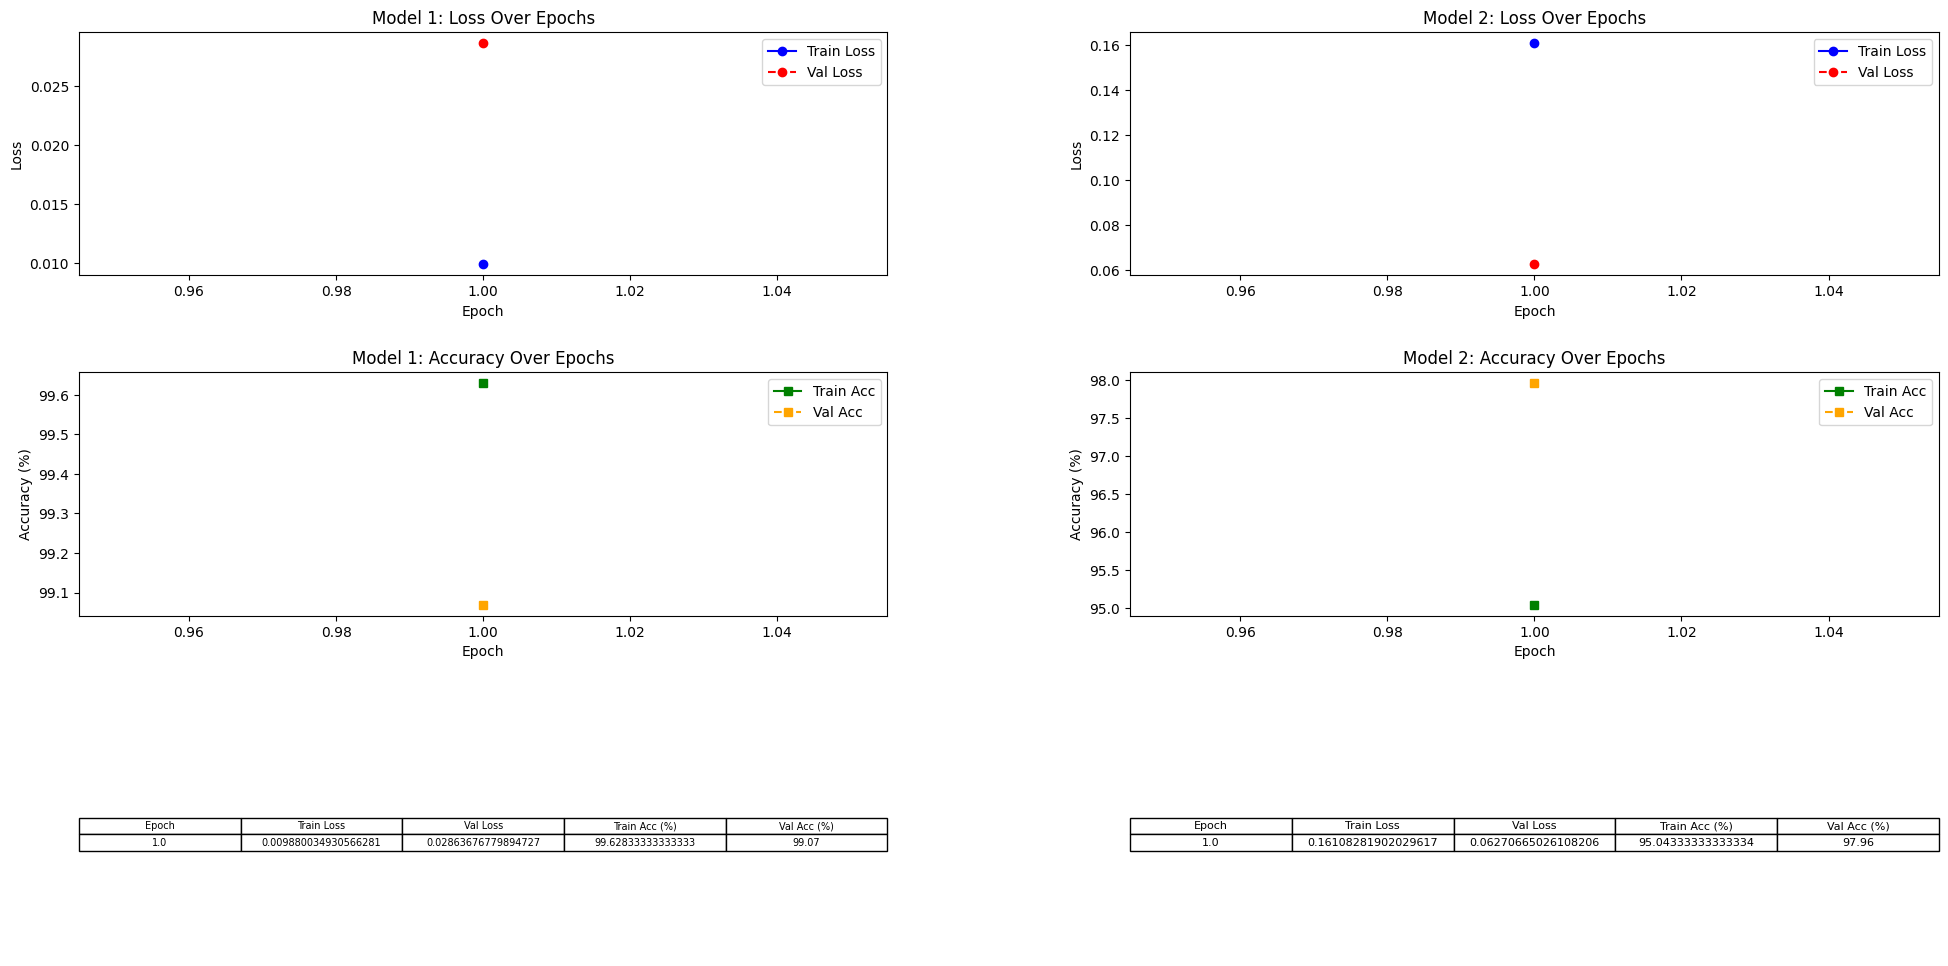

In [40]:
def plot_results_side_by_side(model_results, model_names):
    num_models = len(model_results)
    num_epochs = len(model_results[0][0])
    epochs = np.arange(1, num_epochs + 1)

    fig, axs = plt.subplots(3, num_models, figsize=(12 * num_models, 12))
    fig.subplots_adjust(hspace=0.4, wspace=0.3)

    for i, (train_losses, val_losses, train_accuracies, val_accuracies) in enumerate(model_results):
        model_name = model_names[i]

        df = pd.DataFrame({
            'Epoch': epochs,
            'Train Loss': train_losses,
            'Val Loss': val_losses,
            'Train Acc (%)': train_accuracies,
            'Val Acc (%)': val_accuracies
        })

        # Plot Loss
        ax_loss = axs[0, i] if num_models > 1 else axs[0]
        ax_loss.plot(epochs, train_losses, marker='o', linestyle='-', color='b', label='Train Loss')
        ax_loss.plot(epochs, val_losses, marker='o', linestyle='--', color='r', label='Val Loss')
        ax_loss.set_xlabel('Epoch')
        ax_loss.set_ylabel('Loss')
        ax_loss.set_title(f'{model_name}: Loss Over Epochs')
        ax_loss.legend()

        # Plot Accuracy
        ax_acc = axs[1, i] if num_models > 1 else axs[1]
        ax_acc.plot(epochs, train_accuracies, marker='s', linestyle='-', color='g', label='Train Acc')
        ax_acc.plot(epochs, val_accuracies, marker='s', linestyle='--', color='orange', label='Val Acc')
        ax_acc.set_xlabel('Epoch')
        ax_acc.set_ylabel('Accuracy (%)')
        ax_acc.set_title(f'{model_name}: Accuracy Over Epochs')
        ax_acc.legend()

        # Display Table
        ax_table = axs[2, i] if num_models > 1 else axs[2]
        ax_table.axis('tight')
        ax_table.axis('off')
        ax_table.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

    plt.show()

# Provide your model results as lists of metrics
model_results = [
    (train_losses_1, val_losses_1, train_accs_1, val_accs_1),
    (train_losses_2, val_losses_2, train_accs_2, val_accs_2)
]

model_names = ["Model 1", "Model 2"]

plot_results_side_by_side(model_results, model_names)


## **Comparison**
---
When comparing it to <a href="https://github.com/jupyterlab/jupyter-ai">this</a> tutorial

## **References** <a class="anchor" id="references"></a>
---

- Yasar. K., 2022. PyTorch. [online] Available at: &lt;https://www.techtarget.com/searchenterpriseai/definition/PyTorch&gt; [Accessed 14 March 2025].
- Prakriti, 2024. torch.nn Module in PyTorch. [online] Available at: &lt;https://www.naukri.com/code360/library/torch-nn-module-in-pytorch&gt; [Accessed 14 March 2025].
- https://pytorch.org/docs/stable/optim.html
- https://medium.com/the-modern-scientist/exploring-torchvision-a-powerful-toolkit-for-computer-vision-cb11f7e2e271
- https://pytorch.org/vision/main/transforms.html#:~:text=Torchvision%20supports%20common%20computer%20vision,%2C%20segmentation%2C%20video%20classification.
- https://matplotlib.org/
- https://numpy.org/doc/2.2/user/whatisnumpy.html
- https://www.sciencedirect.com/topics/engineering/convolutional-layer#:~:text=3.1.-,1%20Convolutional%20layer,channels%20of%20the%20convolution%20layer.
- https://www.dremio.com/wiki/pooling-layers/#:~:text=What%20is%20the%20role%20of,Average%20Pooling%2C%20and%20Sum%20Pooling.
- https://www.datacamp.com/tutorial/introduction-to-activation-functions-in-neural-networks
- https://www.geeksforgeeks.org/fully-connected-layer-vs-convolutional-layer/
- https://nn.readthedocs.io/en/rtd/criterion/#:~:text=Criterions%20are%20helpful%20to%20train,Criterions%20are%20serializable.
- https://www.w3schools.com/python/pandas/pandas_intro.asp
- https://medium.com/nerd-for-tech/optimizers-in-machine-learning-f1a9c549f8b4

## **Bibliography** <a class="anchor" id="bibliography"></a>
---